In [1]:
import matplotlib.pyplot as plt
import numpy as np
from util.functions import get_data_ticker, dias_uteis_entre_datas, decompor_sinal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

EMPRESA = 'PETR4.SA'

## Obter dados

In [2]:
dados = get_data_ticker(EMPRESA, period='5y')
dados.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
from sklearn.model_selection import train_test_split

trend = decompor_sinal(dados['Close'], period=132).trend.dropna()
train_trend, test_trend = trend[:int(len(trend)*0.85)], trend[int(len(trend)*0.85):]

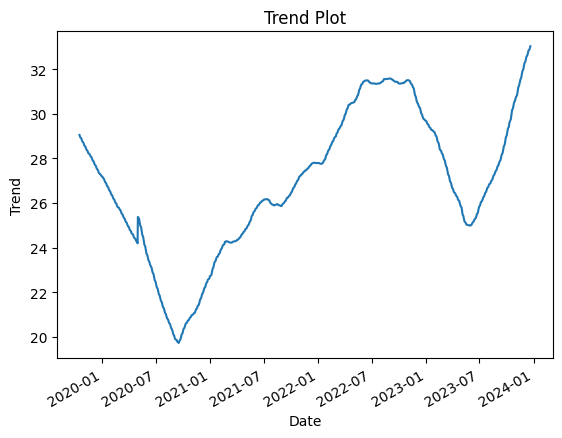

In [4]:
train_trend.plot()
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Plot')
plt.show()

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

model = ARIMA(train_trend, order=(2, 1, 2))
# order = auto_arima(train_trend, seasonal=False).order
# model = ARIMA(train_trend, order=order)
model_fit = model.fit()

/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


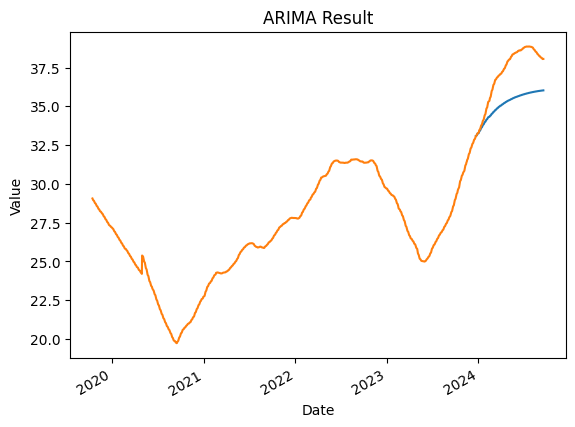

In [6]:
import pandas as pd
arima_result = model_fit.get_forecast(steps=100 if not len(test_trend) else len(test_trend))
arima_result = pd.Series(list(arima_result.predicted_mean), index=test_trend.index if len(test_trend) else range(len(train_trend), len(train_trend)+100))
arima_result.plot()
if test_trend.empty:
    trend.index = range(len(train_trend))
trend.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Result')
plt.show()

/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nikolas/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


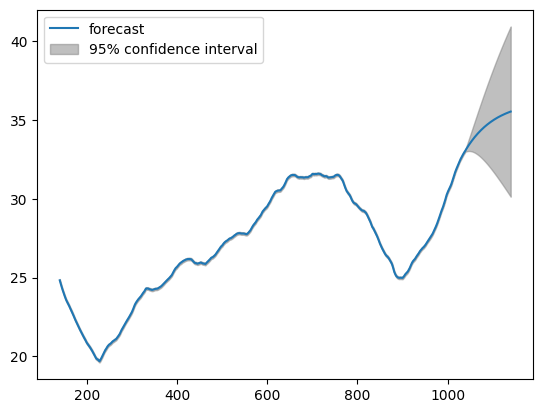

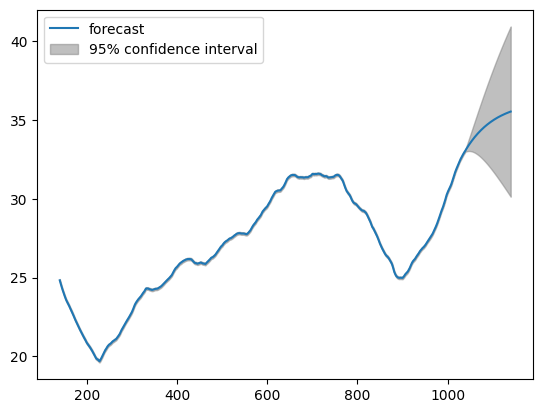

In [7]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# Obtendo o número total de observações
n_obs = len(train_trend)

# Plotando a previsão com índices numéricos
plot_predict(model_fit, start=n_obs-900, end=n_obs + 100)

In [8]:
arima_result.index[0]

Timestamp('2023-12-22 00:00:00')

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [10]:
df_diff = dados[['Close']].diff().dropna()

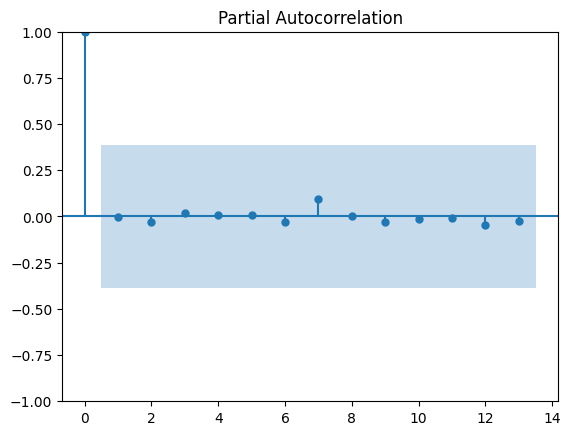

Text(0.5, 1.0, 'Autocorrelação')

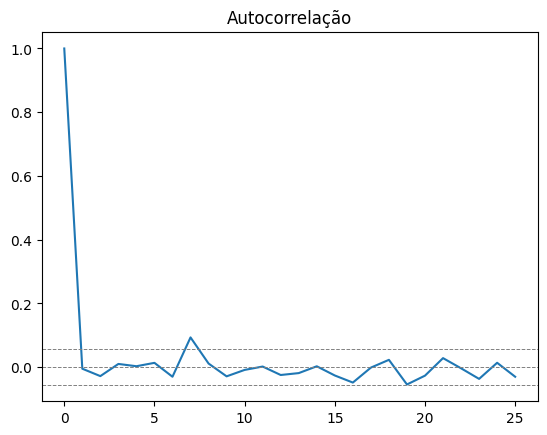

In [11]:
lag_acf = acf(df_diff, nlags=25)
lag_pacf = pacf(df_diff, nlags=25)

plot_pacf(lag_acf)
plt.show()

plt.plot(lag_acf)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")

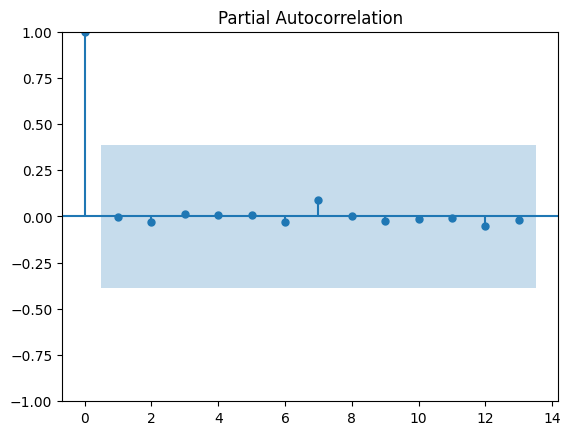

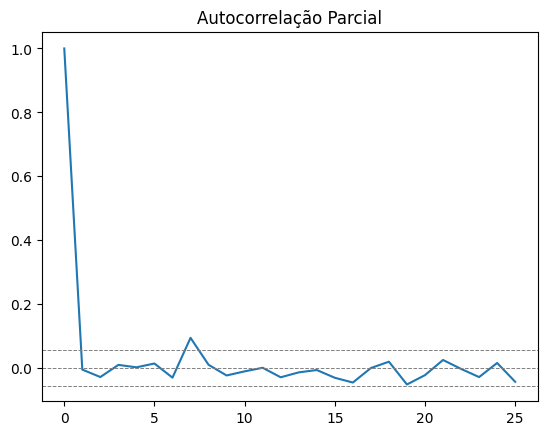

In [12]:
plot_pacf(lag_pacf)
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()